<div style="text-align: center;">
    <h1><strong>CAPSTONE 3</strong></h1>
    <p><em>ANNISA DITASILA</em></p>
    <p><em>DTIDS - 0106</em></p>
</div>


----

# **Business Understanding**

The primary problem faced by the telco company is customer churn. Customer churn refers to the scenario where customers discontinue their subscription services with the company. High churn rates can significantly impact the company’s revenue and profitability, as acquiring new customers is generally more expensive than retaining existing ones. Understanding the reasons behind customer churn and predicting which customers are likely to leave can help the company implement strategies to improve customer retention.

Machine Learning (ML) is needed because it can analyze large volumes of data to identify patterns and correlations that might not be immediately obvious. Traditional methods of data analysis might not effectively capture the complex interactions between different factors that contribute to customer churn. By using ML algorithms, the company can build predictive models that can accurately forecast which customers are at risk of churning. These models can take into account various features such as tenure, online security, contract type, and monthly charges to make informed predictions.

Typically, companies may rely on basic statistical analysis and customer feedback to understand churn. They might implement general retention strategies such as discounts, loyalty programs, or improved customer service. However, these approaches are often reactive rather than proactive and may not be as effective in identifying and addressing the specific needs of customers who are likely to churn.

### Goal
The primary focus is to predict whether a customer will churn or not, and lies in enhancing sensitivity or recall to capture all instances of actual churn, thereby reducing the risk of overlooking customers who might leave the service.

To make accurate predictions, various features of customer profiles are needed, including:
- Dependents: Indicates if the customer has dependents.
- Tenure: The number of months the customer has been with the company.
- OnlineSecurity: Whether the customer has opted for online security services.
- OnlineBackup: Whether the customer has online backup services.
- InternetService: Indicates if the customer subscribes to internet services.
- DeviceProtection: Whether the customer has device protection services.
- TechSupport: Indicates if the customer has tech support services.
- Contract: Type of contract (e.g., month-to-month, one year, two years).
- PaperlessBilling: Whether the customer opts for paperless billing.
- MonthlyCharges: The monthly charges incurred by the customer.

### ML Objective
The ML objective is to develop a predictive model that can identify customers who are likely to churn. By training on historical data, the model can learn the patterns associated with churn and apply this knowledge to predict future churn events. The objective is to achieve high recall in these predictions to ensure the company can rely on the model for effective decision-making.

### Action
Once the prediction results are available, the company can take targeted actions to prevent churn. For instance, they can:
- Offer personalized retention deals and discounts to at-risk customers.
- Enhance customer service and support for those identified as likely to churn.
- Tailor marketing strategies to address the specific needs and concerns of customers at risk.
- Implement proactive measures to improve customer satisfaction and loyalty based on insights from the model.

### Final Result
The final result of implementing the ML model will be a reduction in customer churn rates. By accurately predicting which customers are at risk of leaving, the company can take timely and effective actions to retain them. This will lead to increased customer satisfaction, higher retention rates, and improved revenue and profitability for the company. Additionally, the insights gained from the model can help the company refine its services and offerings to better meet customer needs and prevent churn in the long term.

---

# **Libraries**

In [1]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Statistical Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_classif, chi2, SelectKBest, RFECV

# Missing Data Visualization
import missingno as msn

# Imbalanced Data Handling Libraries
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Model Selection and Evaluation Libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score, mean_squared_error, confusion_matrix, precision_score, recall_score, classification_report, RocCurveDisplay, f1_score, mean_absolute_percentage_error, precision_recall_curve, fbeta_score
from sklearn.metrics._scorer import _SCORERS

# Classification and Regression Libraries
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# LightGBM and XGBoost Libraries
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Preprocessing Libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, KBinsDiscretizer, PolynomialFeatures, LabelEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Encoding Libraries
from category_encoders import TargetEncoder, BinaryEncoder

# Imputation Libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer

# Resampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler, TomekLinks
from imblearn.pipeline import Pipeline as ImbPipeline

# Warnings
import warnings
warnings.filterwarnings("ignore")

# saving model
import pickle
import lime
from lime import lime_tabular

# Interpretation model
import shap

# Set Random State
RANDOM_STATE = 2024
np.random.seed(RANDOM_STATE)


---

# **Data Understanding**

In [2]:
# data load
df = pd.read_csv('telco_customer_churn.csv')
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [3]:
df.columns = df.columns.str.lower() # turning the capital to lower case

In [4]:
df.drop_duplicates(inplace=True) # delete all duplicates

In [5]:
pd.DataFrame({
    'columns'           : df.columns.values,
    'data_type'         : df.dtypes.values,
    'null_value'        : df.isna().sum(),
    'n_unique'          : df.nunique().values,
    'duplicate'         : df.duplicated().sum(),
    'unique_values'     : [df[col].unique() for col in df.columns],
    'top'               : [df[col].mode().iloc[0] if not df[col].mode().empty else None for col in df.columns],
    'freq'              : [df[col].value_counts().iloc[0] if not df[col].value_counts().empty else None for col in df.columns]
}).reset_index(drop=True)

,columns,data_type,null_value,n_unique,duplicate,unique_values,top,freq
0,dependents,object,0,2,0,"[Yes, No]",No,3380
1,tenure,int64,0,73,0,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1...",1,390
2,onlinesecurity,object,0,3,0,"[No, Yes, No internet service]",No,2420
3,onlinebackup,object,0,3,0,"[No, Yes, No internet service]",No,2148
4,internetservice,object,0,3,0,"[DSL, Fiber optic, No]",Fiber optic,2154
5,deviceprotection,object,0,3,0,"[Yes, No internet service, No]",No,2162
6,techsupport,object,0,3,0,"[Yes, No, No internet service]",No,2442
7,contract,object,0,3,0,"[Month-to-month, Two year, One year]",Month-to-month,2665
8,paperlessbilling,object,0,2,0,"[Yes, No]",Yes,2925
9,monthlycharges,float64,0,1422,0,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,...",20.05,35


In terms of data types, the dataset includes categorical data (object type), such as `dependencies`, `onlinesecurity`, `onlinebackups`, `deviceprotection`, `techsupport` ,`contract` , `paperless billing` , and `churn` status.


Numerical data types (integer and float64) capture essential customer metrics, such as `tenure` and `monthlycharges` incurred. These metrics offer insights into customer loyalty and spending patterns.


Each column exhibits a range of unique values, underscoring the diversity in customer preferences. Also the dataset's cleanliness is evident, with no duplicated records, ensuring data integrity and reliability for analytical purposes. Frequencies of top values within categorical columns reveal prevalent customer choices.

## 1. EDA

In [6]:
# Categorical columns to convert
two_cat = ['dependents', 'paperlessbilling', 'churn']
three_cat = ['onlinesecurity', 'onlinebackup', 'internetservice', 'deviceprotection', 'techsupport']

# Mapping for ordinal encoding
# ordinal_ordered = {'contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2}}
df_copy = df.copy()

# Convert two-category columns
for col in two_cat:
    df_copy[col] = df_copy[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert three-category columns
for col in three_cat:
    df_copy[col] = df_copy[col].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 2))

# Applying updated mapping to 'contract' column
df_copy['contract'] = df_copy['contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2, 'Three year': 3})


In [7]:
df_copy

,dependents,tenure,onlinesecurity,onlinebackup,internetservice,deviceprotection,techsupport,contract,paperlessbilling,monthlycharges,churn
0,1,9,0,0,2,1,1,0,1,72.90,1
1,0,14,0,1,2,1,0,0,1,82.65,0
2,0,64,1,0,2,1,1,2,0,47.85,1
3,0,72,1,1,2,1,1,2,0,69.65,0
4,0,3,2,2,0,2,2,0,1,23.60,0
...,...,...,...,...,...,...,...,...,...,...,...
4925,0,15,0,0,2,1,1,0,1,103.45,0
4926,1,10,0,0,2,1,1,0,1,91.10,0
4927,0,58,2,2,0,2,2,2,0,20.75,0
4928,0,1,0,0,2,0,0,0,1,69.75,1


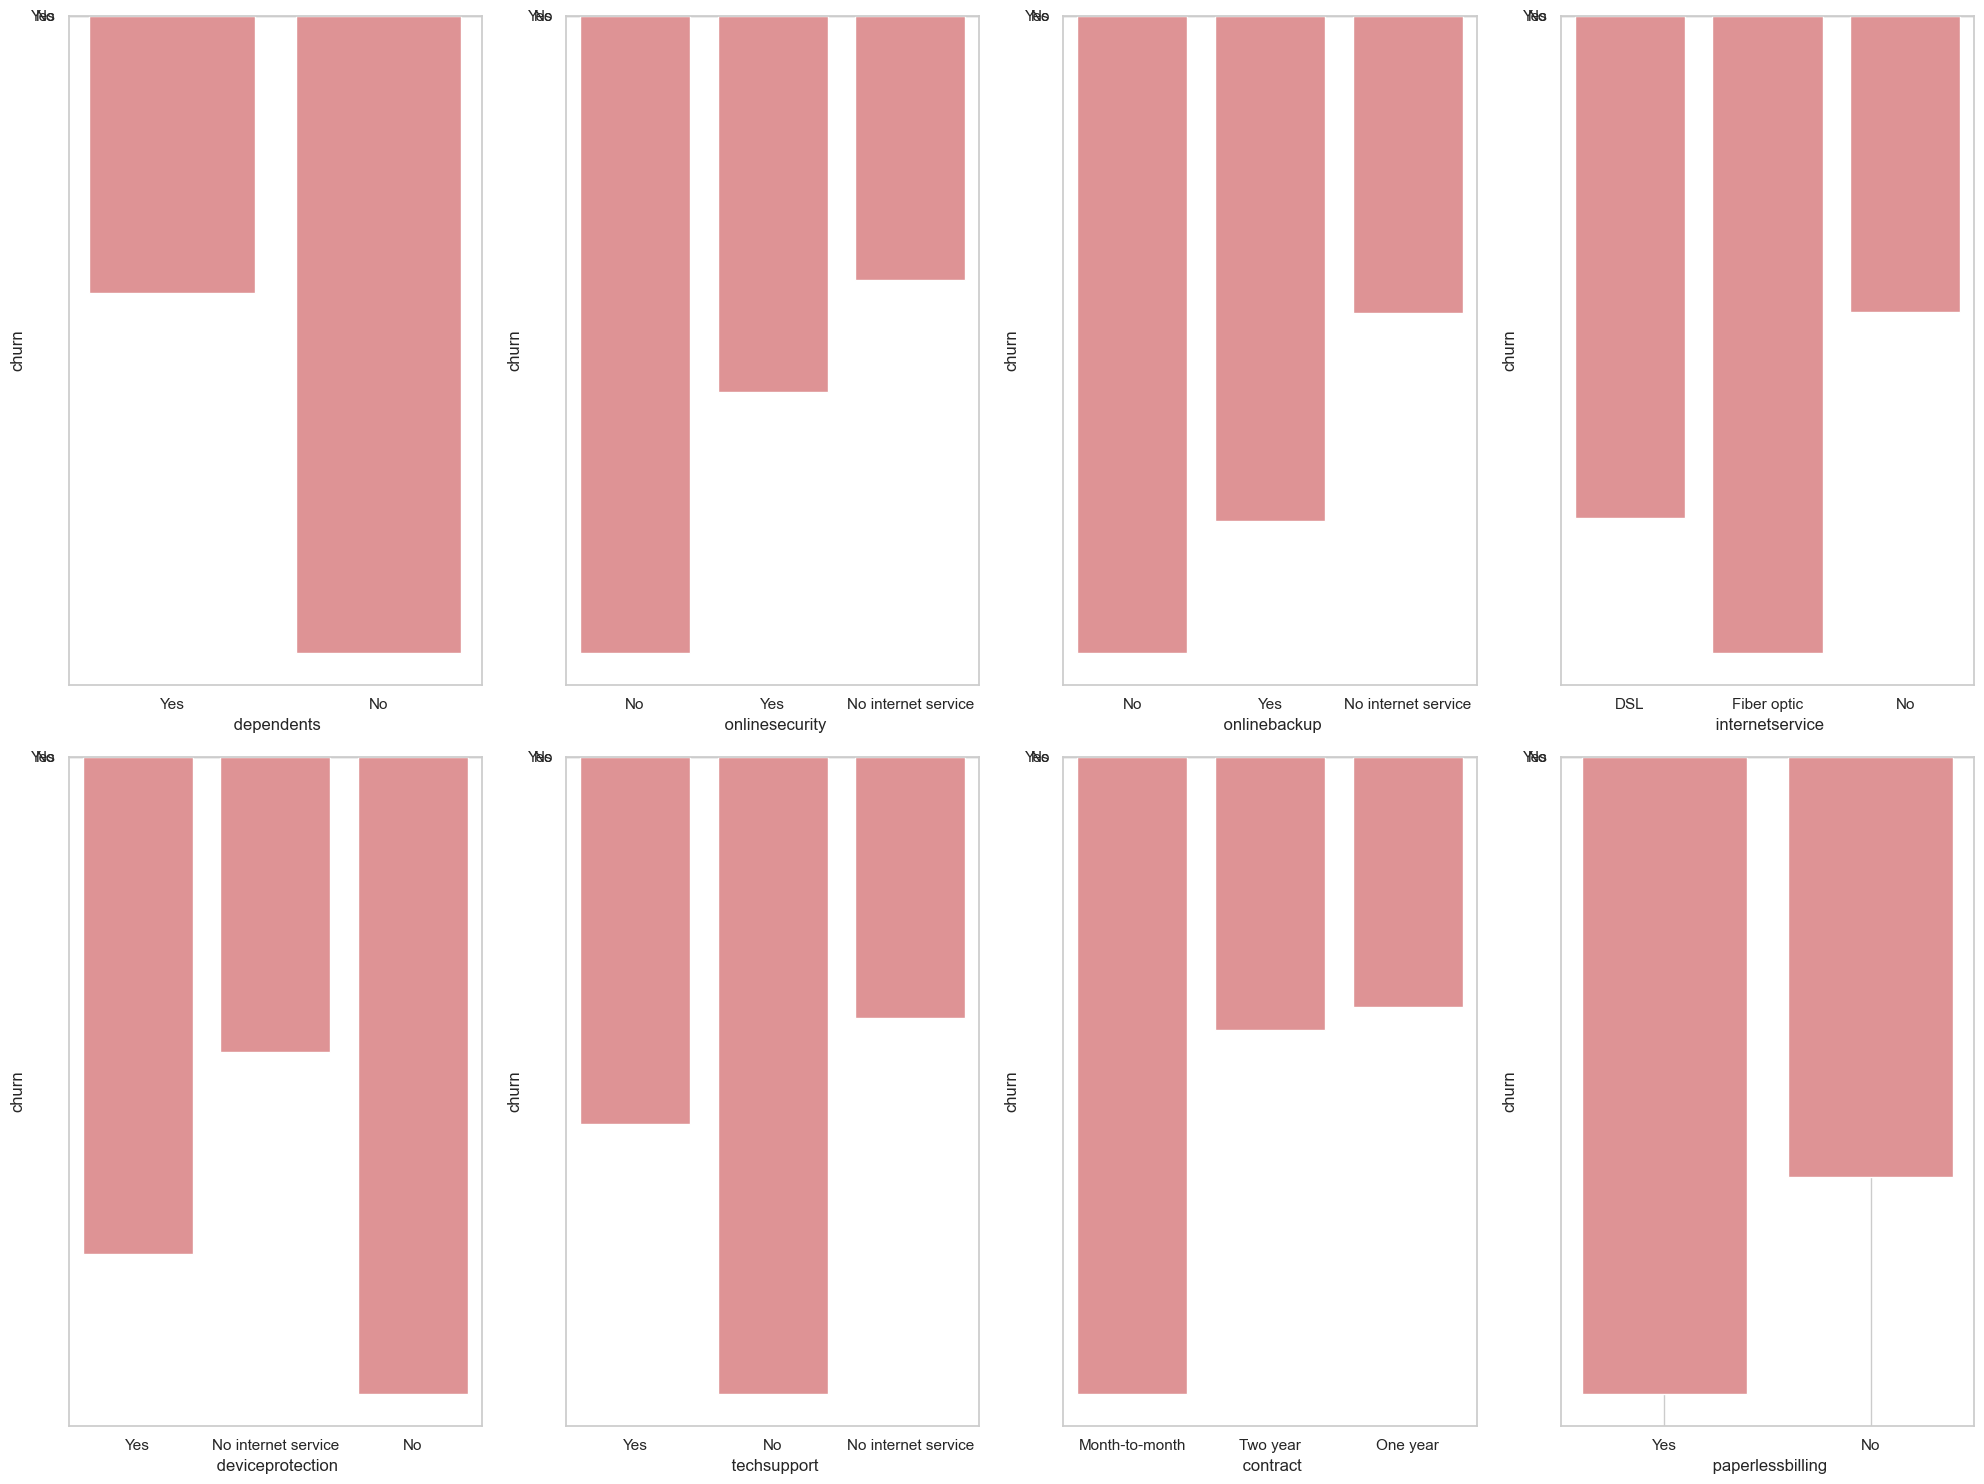

In [8]:
cat_columns = ['dependents', 'onlinesecurity', 'onlinebackup',
               'internetservice', 'deviceprotection', 'techsupport',
               'contract', 'paperlessbilling']

plt.figure(figsize=(20, 15))
sns.set(style='whitegrid', palette=['#EB8689'])

# Loop through each categorical column
for i, feature in enumerate(cat_columns, start=1):
    plt.subplot(2, 4, i)
    sns.barplot(data=df, x=feature, y='churn', estimator='count', errorbar=None)
    plt.xlabel(f' {feature}')

plt.grid(True)
plt.tight_layout()
plt.show()


`Dependents:` Customers without dependents churn more frequently than those with dependents. This could imply that customers with dependents may have more stable or predictable needs.

`Online Security:`Customers without online security services churn at a higher rate than those with online security. Those without internet service are not considered here, but it suggests that having online security can reduce churn.

`Online Backup:` Similar to online security, customers without online backup services churn more frequently than those with such services.
This indicates that online backup services may contribute to customer retention.

`Internet Service:`Customers using DSL or fiber optic services churn at higher rates compared to those without internet service. This may reflect differences in service satisfaction or alternatives available to these customers.

`Device Protection:`Customers without device protection churn more frequently than those with device protection. Having device protection appears to be a factor in retaining customers.

`Tech Support:`Customers without tech support churn more often than those with tech support services. This suggests that access to tech support is important for customer retention.

`Contract:`Month-to-month contract customers churn significantly more than those with one or two-year contracts. Longer contracts appear to be effective in reducing churn.

`Paperless Billing:`Customers with paperless billing churn at a higher rate compared to those without paperless billing. This could indicate that traditional billing methods still hold importance for some customers.

In [9]:
# Churn Distribution

def create_pivot(feature):
    df_pivot = df.pivot_table(
        index='churn',
        columns=feature,
        aggfunc='size',
        fill_value=0
    )

    df_pivot.loc['Total'] = df_pivot.sum()

    for index in df_pivot.index:
        if index != 'Total':
            df_pivot.loc['%'] = round(df_pivot.loc['Total'] / df_pivot.loc['Total'].sum() * 100, 1)

    df_pivot = df_pivot.T
    return df_pivot

for k in cat_columns:
    display(create_pivot(k))
    print()

churn,No,Yes,Total,%
dependents,,,,
No,2316.0,1064.0,3380.0,69.6
Yes,1249.0,224.0,1473.0,30.4


churn,No,Yes,Total,%
onlinesecurity,,,,
No,1419.0,1001.0,2420.0,49.9
No internet service,928.0,75.0,1003.0,20.7
Yes,1218.0,212.0,1430.0,29.5


churn,No,Yes,Total,%
onlinebackup,,,,
No,1284.0,864.0,2148.0,44.3
No internet service,928.0,75.0,1003.0,20.7
Yes,1353.0,349.0,1702.0,35.1


churn,No,Yes,Total,%
internetservice,,,,
DSL,1385.0,311.0,1696.0,34.9
Fiber optic,1252.0,902.0,2154.0,44.4
No,928.0,75.0,1003.0,20.7


churn,No,Yes,Total,%
deviceprotection,,,,
No,1332.0,830.0,2162.0,44.5
No internet service,928.0,75.0,1003.0,20.7
Yes,1305.0,383.0,1688.0,34.8


churn,No,Yes,Total,%
techsupport,,,,
No,1443.0,999.0,2442.0,50.3
No internet service,928.0,75.0,1003.0,20.7
Yes,1194.0,214.0,1408.0,29.0


churn,No,Yes,Total,%
contract,,,,
Month-to-month,1515.0,1150.0,2665.0,54.9
One year,939.0,106.0,1045.0,21.5
Two year,1111.0,32.0,1143.0,23.6


churn,No,Yes,Total,%
paperlessbilling,,,,
No,1611.0,317.0,1928.0,39.7
Yes,1954.0,971.0,2925.0,60.3


Varying churn rates across different customer attributes shows that the customers without dependents have a higher churn rate (30.4%) compared to those with dependents (9.2%). Regarding services, customers without online security (49.9%), online backup (44.3%), device protection (44.5%), or tech support (50.3%) exhibit higher churn rates. Fiber optic internet users show a notably higher churn rate (44.4%) compared to DSL (19.2%) or no internet service (7.0%). Contract type also influences churn, with month-to-month contracts having a higher churn rate (54.9%) than one-year (10.1%) or two-year contracts (2.8%). Paperless billing correlates with higher churn (33.2%) compared to non-paperless (16.4%). 

Out of a total of 4,853 observations:

- 3,565 customers did not churn (labeled as churn = 0), which accounts for approximately 73.46% of the total.
- 1,288 customers churned (labeled as churn = 1), making up about 26.54% of the total.

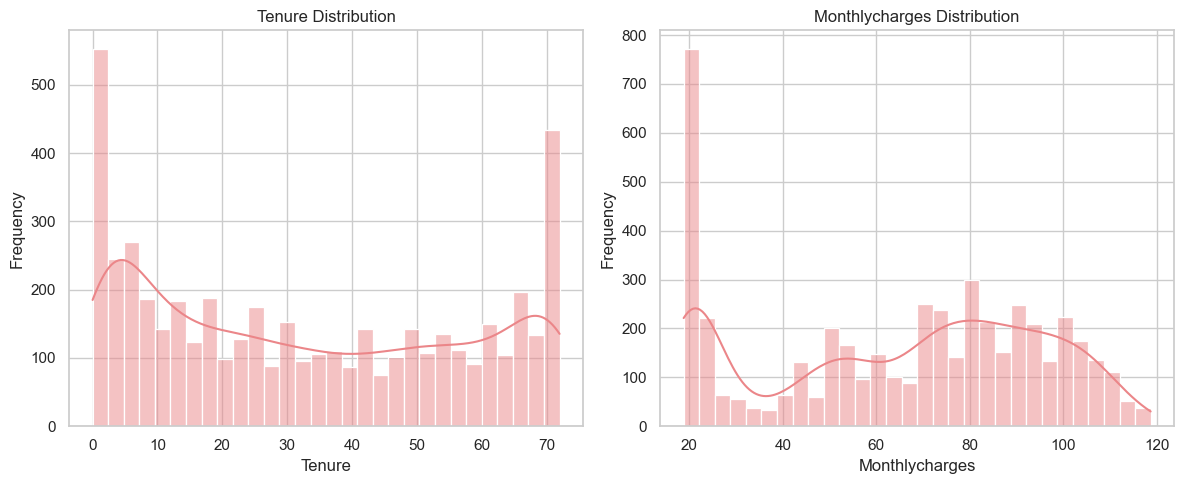

In [10]:
# Columns to plot
num_columns = ['tenure', 'monthlycharges']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Iterate over columns and plot histograms
for i, column in enumerate(num_columns):
    sns.histplot(df[column], ax=axes[i], bins=30, kde=True)
    axes[i].set_title(f'{column.capitalize()} Distribution')
    axes[i].set_xlabel(f'{column.capitalize()}')
    axes[i].set_ylabel('Frequency')

# Adjust layout and display plot
plt.tight_layout()
plt.show()


Tenure Distribution

The distribution of customer tenure spans from 0 to 72 months, and a significant peak of customers with very short tenures (close to 0 months), indicating a large influx of new customers. The frequency of customers gradually decreases as tenure increases, stabilizing with some fluctuations between 10 to 60 months. There is another notable peak in the number of customers with the longest tenures (around 70 months), highlighting a group of very loyal, long-term customers.

Monthly Charges Distribution

Monthly charges for customers range approximately from $20 to $120 and a high frequency of customers is observed with low monthly charges (around $20), suggesting many customers opt for basic service plans. There is a noticeable dip in customer frequency as monthly charges increase from $20 to $40. The frequency increases again and shows multiple peaks for mid-range monthly charges ($40 to $80), indicating a diverse set of service packages or additional features that appeal to customers. The frequency gradually decreases for higher monthly charges ($80 to $120), implying that premium services are less common but still cater to a specific segment of the customer base.

In [11]:
cat = ['dependents', 'onlinesecurity', 'onlinebackup',
     'internetservice', 'deviceprotection', 'techsupport', 'contract',
     'paperlessbilling', 'churn']

# Convert columns to categorical dtype
df_copy[cat] = df_copy[cat].astype('category')

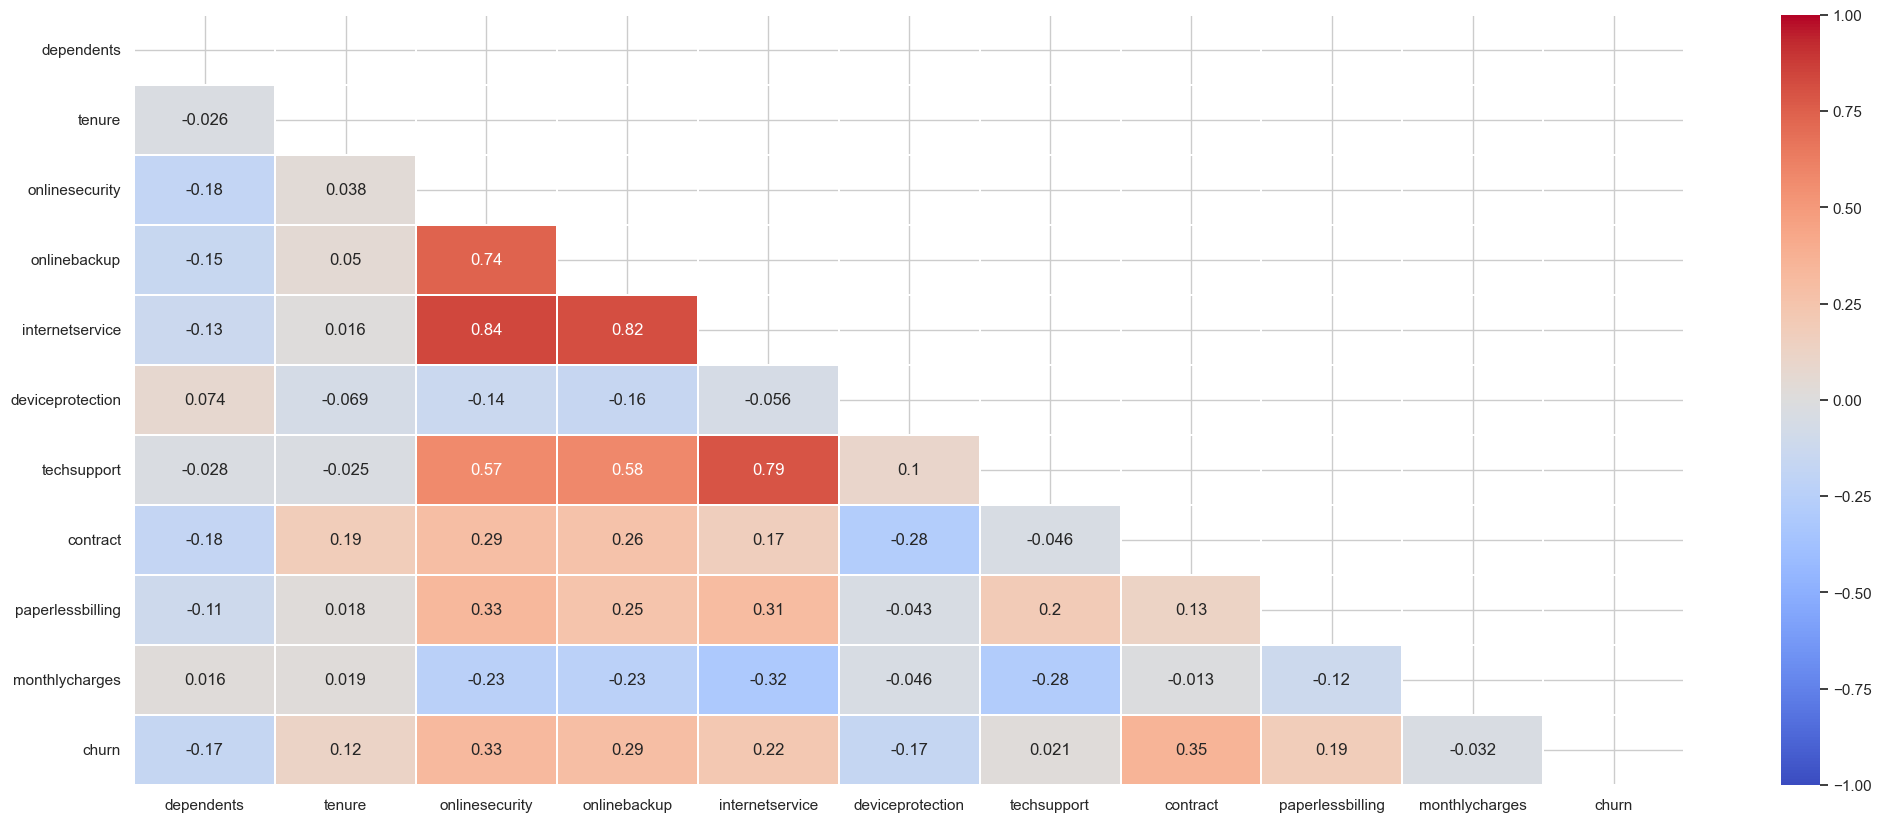

In [12]:
plt.figure(figsize=(25, 10))

corr = df_copy.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

Strong Correlations:

- Internet Service and Online Backup (0.84): Customers who have one of these services often have the other.
- Internet Service and Online Security (0.82): There is a strong association between having internet service and online security.
- Tech Support and Online Security (0.57), Tech Support and Online Backup (0.58), and Tech - Support and Internet Service (0.79): These correlations indicate that customers who subscribe to tech support often also subscribe to online security and backup services.

Medium Correlations:

- Churn and Online Security (0.33): Customers with online security services have a moderate likelihood of churning.
- Churn and Online Backup (0.29): Similar to online security, customers with online backup services show a moderate tendency to churn.
- Contract and Tech Support (0.26): There is a moderate positive relationship, suggesting that customers with longer contracts are more likely to use tech support services.
- Paperless Billing and Online Security (0.33), Paperless Billing and Tech Support (0.31): These correlations indicate a moderate relationship between opting for paperless billing and having online security or tech support.

Low Correlations:

- Dependents and Churn (-0.17): There is a weak negative relationship, implying customers with dependents are slightly less likely to churn.
- Tenure and Churn (0.12): Indicates a weak positive relationship between tenure and churn.
- Monthly Charges and Churn (-0.032): Shows a very weak negative relationship, suggesting little impact of monthly charges on churn.
- Device Protection and Tech Support (0.1): There is a weak positive correlation, indicating a slight tendency for customers with device protection to also have tech support.

## 2. Feature Selection

In [13]:
continuous_features = ["monthlycharges","tenure"]
categorical_features = ['dependents', 'onlinesecurity', 'onlinebackup',
       'internetservice', 'deviceprotection', 'techsupport', 'contract',
       'paperlessbilling', 'churn']

# Apply ANOVA F-test to continuous features
continuous_selector = SelectKBest(score_func=f_classif, k='all')
continuous_selector.fit(df[continuous_features], df['churn'])
continuous_scores = pd.DataFrame({
    'Feature': continuous_features,
    'Score': continuous_selector.scores_,
    'P-Value': continuous_selector.pvalues_
}).sort_values(by='Score', ascending=False)

# Apply chi-squared test to categorical features
encoded_df = pd.get_dummies(df[categorical_features])
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(encoded_df, df['churn'])
chi2_scores = pd.DataFrame({
    'Feature': encoded_df.columns,
    'Score': chi2_selector.scores_,
    'P-Value': chi2_selector.pvalues_
}).sort_values(by='Score', ascending=False)

# Combine scores for review
combined_scores = pd.concat([continuous_scores, chi2_scores], axis=0)
combined_scores

,Feature,Score,P-Value
1,tenure,726.504745,3.123697e-149
0,monthlycharges,190.281008,1.734247e-42
23,churn_Yes,3565.000000,0.000000e+00
22,churn_No,1288.000000,4.581411e-282
17,contract_Month-to-month,377.198369,5.069047e-84
19,contract_Two year,330.427400,7.757098e-74
2,onlinesecurity_No,272.742863,2.865004e-61
9,internetservice_Fiber optic,259.821573,1.876761e-58
14,techsupport_No,258.602215,3.461011e-58
5,onlinebackup_No,206.278279,8.909917e-47


In [14]:
len(combined_scores[combined_scores["P-Value"]>0.05])

0

All features in the dataset have statistically significant relationships with the target variable based on p-values below 0.05 from chi-squared tests for categorical variables and F-tests for numerical variables, so the variables in the dataset are not being deleted.

# **Preprocessing**

## 1. Missing Values

In [15]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Checking for missing values in categorical columns:\n")

for cat in cat_cols:
    # Count missing values in each categorical column
    missing_count = df[cat].isnull().sum()
    print(f"{cat}: {missing_count} missing values")

print("\nNote: '0' indicates there are no missing values in categorical columns.")


Checking for missing values in categorical columns:

dependents: 0 missing values
onlinesecurity: 0 missing values
onlinebackup: 0 missing values
internetservice: 0 missing values
deviceprotection: 0 missing values
techsupport: 0 missing values
contract: 0 missing values
paperlessbilling: 0 missing values
churn: 0 missing values

Note: '0' indicates there are no missing values in categorical columns.


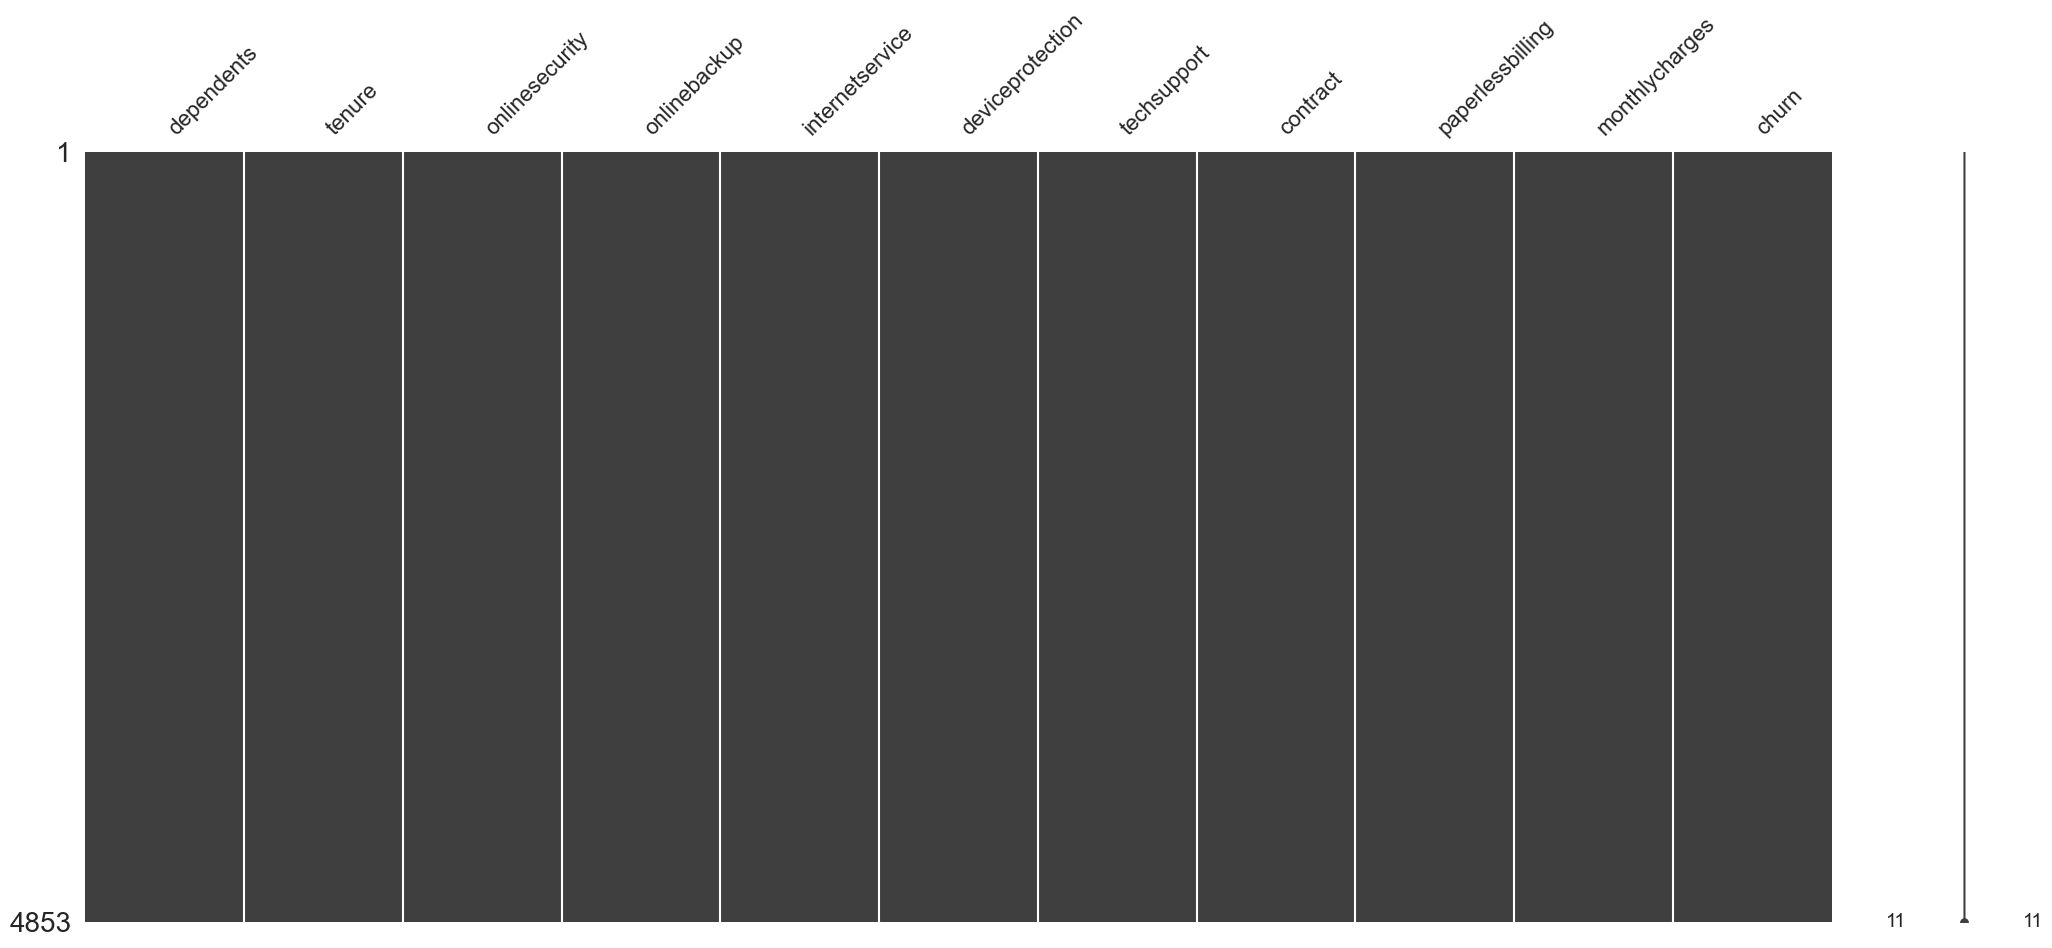

In [16]:
# visuallization mising values using msno

import missingno as msno
%matplotlib inline
msno.matrix(df)
plt.show()

## 2. Outliers

In [17]:
# handling outliers
numerical = num_columns.copy()

def calculate_outliers(data, column):
    Q1 = data[column].quantile(.25)
    Q3 = data[column].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = data[
        (data[column] < lower_bound) | (data[column] > upper_bound)
    ]
    return outliers, lower_bound, upper_bound

outlier_data = []

for i in numerical:
    outliers_result, lower_bound, upper_bound = calculate_outliers(df, i)
    total_outlier = len(outliers_result)
    outlier_percentage = round(total_outlier / len(df[i]) * 100, 2)
    outlier_data.append([i, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=[
    'column', 'total_outlier', 'percentage', 'lower_bound', 'upper_bound'
])

outlier_df

,column,total_outlier,percentage,lower_bound,upper_bound
0,tenure,0,0.0,-61.50,126.50
1,monthlycharges,0,0.0,-34.95,165.05


There are no outliers detected in the 'tenure' column based on the specified bounds. The lower bound is set at -61.50, and the upper bound is set at 126.50. Similarly, no outliers are found in the 'monthlycharges' column within the defined bounds. The lower bound is -34.95, and the upper bound is 165.05.

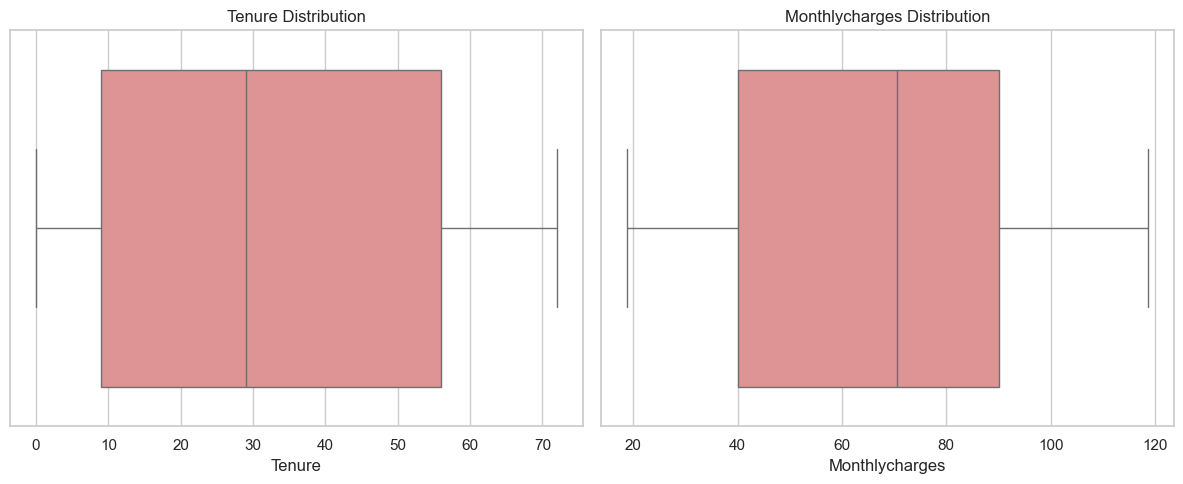

In [18]:
# Visualize the numerical columns
fig, axes = plt.subplots(1, len(num_columns), figsize=(12, 5))

# Iterate over columns and create boxplots
for i, col in enumerate(num_columns):
    sns.boxplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col.capitalize()} Distribution')
    axes[i].set_xlabel(col.capitalize())

plt.tight_layout()
plt.show()


## 3. Splitting

In [19]:
# splitting dataset

X=df.drop(['churn'], axis=1)
y=df['churn'].replace({'No': 0, 'Yes':1})

X_train, X_test, y_train, y_test = train_test_split(
                                    X,
                                    y,
                                    test_size=0.2,
                                    random_state=RANDOM_STATE,
                                    stratify=y)

print(X_train.shape, X_test.shape)

(3882, 10) (971, 10)


Before splitting, the dataset had dimensions of (4853, 11) with 1 column as a target (label). To ensure stratified sampling, where the distribution of a specific variable 'y' is maintained across both sets, splitting the dataset using an 80/20 ratio, with 80% allocated for training and 20% for testing. After splitting it into training and test sets, where each set has 10 columns:
- The training set contains 3882 rows.
- The test set contains 971 rows.

## 4. Feature Engineering

In [20]:
# Column lists
ordinal_columns = ['contract']
ordinal_ordered = [['Month-to-month', 'One year', 'Two year']]

nominal_columns = ['dependents', 'onlinesecurity', 'onlinebackup',
                   'internetservice', 'deviceprotection', 'techsupport', 'paperlessbilling']

categorical_columns = ordinal_columns + nominal_columns
numerical_columns = ['tenure', 'monthlycharges']

# Pipeline for nominal data
pipeline_nominal = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot_encoding', OneHotEncoder(dtype=int))
])

# Pipeline for ordinal data
pipeline_ordinal = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoding', OrdinalEncoder(categories=ordinal_ordered))
])

# Pipeline for numerical data
pipeline_numerical = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('standardization', StandardScaler())  
])

# PipeLine for numerical data without standardization
pipeline_numerical_without_scaler = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

# ColumnTransformer based with scaler
transformer_based = ColumnTransformer([
    ('nominal_transform', pipeline_nominal, categorical_columns),
    # ('ordinal_transform', pipeline_ordinal, ordinal_columns),
    ('numerical_transform', pipeline_numerical, numerical_columns),
], remainder='passthrough')

transformer_treebased = ColumnTransformer([
    ('nominal_transform', pipeline_nominal, categorical_columns),
    # ('ordinal_transform', pipeline_ordinal, ordinal_columns),
    ('numerical_transform', pipeline_numerical_without_scaler, numerical_columns)
], remainder='passthrough')

# fit the new transformer
transformer_based.fit(X_train)
transformer_treebased.fit(X_train)


# show the result of transformation
transform_results_df = pd.DataFrame(
    transformer_based.transform(X_train)) 

transform_results_tree_df = pd.DataFrame(
    transformer_treebased.transform(X_train))


In [21]:
# clean result formatting feature's name
features = list(transformer_based.get_feature_names_out())

list_features = []
for feature in features:
    list_features.append(''.join(feature.split('__')[-1]))

transform_results_df = pd.DataFrame(
    transformer_based.transform(X_train),
    columns = list_features) 

transform_results_tree_df = pd.DataFrame(
    transformer_treebased.transform(X_train),
    columns = list_features)

transform_results_tree_df

,contract_Month-to-month,contract_One year,contract_Two year,dependents_No,dependents_Yes,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,...,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,paperlessbilling_No,paperlessbilling_Yes,tenure,monthlycharges
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,56.0,75.85
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.0,31.05
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,56.0,19.70
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,22.0,25.60
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,60.0,103.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,25.0,89.15
3878,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,7.0,35.50
3879,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,7.0,35.30
3880,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.50


To prepare data for machine learning models, the pipelines and transformers are set up to handle missing values, encode categorical variables, and standardize numerical features as needed. This preprocessing ensures that unseen data passed through the pipeline is properly transformed, providing flexibility for different model types (general vs. tree-based) during prediction.

---

# **Modeling**

## Benchmarking before resampling

In [22]:
# Based models
dtree = DecisionTreeClassifier(random_state=RANDOM_STATE)
logreg = LogisticRegression(random_state=RANDOM_STATE)
knn = KNeighborsClassifier(n_neighbors=5)

# Ensemble model method
ada = AdaBoostClassifier(dtree, random_state=RANDOM_STATE)
rfc = RandomForestClassifier(random_state=RANDOM_STATE)
gbm = GradientBoostingClassifier(random_state=RANDOM_STATE)
xgb = XGBClassifier(random_state=RANDOM_STATE)

In [23]:
# Model lists
based_model = [logreg, knn]
ensemble_model = [dtree, ada, rfc, gbm, xgb]
all_models = based_model + ensemble_model

# Results lists
model_name = []
score = []
train_score = []
std_value = []

# Stratified K-Fold
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate based models

# Evaluate based models
for model in all_models:
    if model in based_model:
        transformer = transformer_based
    else:
        transformer = transformer_treebased

    model_pipeline = Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])

    model_cv = cross_val_score(
        model_pipeline,
        X_train,
        y_train,
        cv=skfold,
        scoring='recall',
        error_score='raise'
    )

    print(f"{model.__class__.__name__}: {model_cv}")

    # Storing results
    score.extend(model_cv)
    train_score.append(model_cv.mean())
    std_value.append(model_cv.std())
    model_name.append(model.__class__.__name__)


LogisticRegression: [0.54368932 0.53883495 0.53398058 0.50485437 0.52427184]
KNeighborsClassifier: [0.50485437 0.52912621 0.4368932  0.52427184 0.45631068]
DecisionTreeClassifier: [0.54368932 0.51456311 0.46601942 0.52912621 0.40291262]
AdaBoostClassifier: [0.51456311 0.52912621 0.50970874 0.51456311 0.42718447]
RandomForestClassifier: [0.50485437 0.5        0.44174757 0.49029126 0.45631068]
GradientBoostingClassifier: [0.52912621 0.54854369 0.53883495 0.5        0.47572816]
XGBClassifier: [0.53398058 0.5776699  0.53883495 0.51941748 0.48058252]


In [24]:
benchmark_model_train = pd.DataFrame({
    'model': model_name,
    'train_score': train_score
}).sort_values(by='train_score', ascending=False).reset_index(drop=True)

benchmark_model_train

,model,train_score
0,XGBClassifier,0.530097
1,LogisticRegression,0.529126
2,GradientBoostingClassifier,0.518447
3,AdaBoostClassifier,0.499029
4,DecisionTreeClassifier,0.491262
5,KNeighborsClassifier,0.490291
6,RandomForestClassifier,0.478641


In [25]:
# Check the best benchmark model on test dataset
all_models = based_model + ensemble_model

test_score = []
model_name = []

for model in all_models:
    if model in based_model:
        transformer = transformer_based
    else:
        transformer = transformer_treebased

    model_pipeline = Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])

    model_pipeline.fit(X_train, y_train)

    y_pred = model_pipeline.predict(X_test)

    recall = recall_score(y_test, y_pred)
    test_score.append(recall)
    model_name.append(model.__class__.__name__)


In [26]:
benchmark_model_test = pd.DataFrame({
    'model': model_name,
    'test_score': test_score,
}).sort_values(by='test_score', ascending=False)

benchmark_model_test

,model,test_score
0,LogisticRegression,0.550388
3,AdaBoostClassifier,0.531008
6,XGBClassifier,0.511628
5,GradientBoostingClassifier,0.503876
2,DecisionTreeClassifier,0.500000
1,KNeighborsClassifier,0.496124
4,RandomForestClassifier,0.492248


In [27]:
# Comparing benchmark model on training data and test data

bench_model = pd.merge(benchmark_model_test,benchmark_model_train, on='model')
bench_model['diff'] = bench_model['test_score'] - bench_model['train_score']
bench_model.sort_values(by='test_score', ascending=False)

,model,test_score,train_score,diff
0,LogisticRegression,0.550388,0.529126,0.021261
1,AdaBoostClassifier,0.531008,0.499029,0.031979
2,XGBClassifier,0.511628,0.530097,-0.018469
3,GradientBoostingClassifier,0.503876,0.518447,-0.014571
4,DecisionTreeClassifier,0.500000,0.491262,0.008738
5,KNeighborsClassifier,0.496124,0.490291,0.005833
6,RandomForestClassifier,0.492248,0.478641,0.013607


From based models we can conclude that: 

`Logistic Regression`:
Logistic Regression achieves a test accuracy of approximately 55.0%, which is slightly higher than its training accuracy of 52.4%. There is an observed performance difference of approximately 2.1%, indicating the model performs slightly better on unseen data than on training data.

`XGBClassifier (XGBoost)`:
XGBoost shows a test accuracy of about 51.3%, very close to its training accuracy of 53.0%.
The difference between test and training scores is negligible (-1.8%), suggesting minimal overfitting or a well-generalized model.

`AdaBoostClassifier`:
AdaBoost achieves a test accuracy of around 53.1%, while its training accuracy is 49.9%.
There is a notable difference of approximately 3.1% between test and training scores.

`GradientBoostingClassifier`:
Gradient Boosting Classifier also shows a test accuracy of approximately 50.3%, similar to XGB.
The difference between test and training scores is -1.4%, indicating a very slight difference where the test score is marginally lower than the training score. This suggests that the Gradient Boosting model is generally well-generalized, with consistent performance between training and test datasets.

## Benchmarking after resampling

In [28]:
# Resampling techniques
smote = SMOTE(random_state=RANDOM_STATE)
nearmiss = NearMiss()
ros = RandomOverSampler(random_state=RANDOM_STATE)
rus = RandomUnderSampler(random_state=RANDOM_STATE)

# List of models and resampling techniques
based_model = [logreg, knn]
ensemble_model = [dtree, ada, rfc, gbm, xgb]
all_models = based_model + ensemble_model
resampling_methods = [smote, nearmiss, ros, rus]
resampling_names = ['SMOTE', 'NearMiss', 'RandomOverSampler', 'RandomUnderSampler']

results_train = []

# Cross-validation with resampling on training data
for resample_method, resample_name in zip(resampling_methods, resampling_names):
    for model in all_models:
        if model in based_model:
            transformer = transformer_based
        else:
            transformer = transformer_treebased

        pipeline = ImbPipeline([
            ('transformer', transformer),
            ('balancing', resample_method),
            ('model', model)
        ])

        model_cv_scores = cross_val_score(
            pipeline,
            X_train,
            y_train,
            cv=5,
            scoring='recall',
            error_score='raise'
        )

        results_train.append({
            'Model': model.__class__.__name__,
            'Resampling': resample_name,
            'Train Recall Score': model_cv_scores.mean()
        })

# Convert training results to DataFrame
train_score_after_resampling = pd.DataFrame(results_train)

In [29]:
results_test = []

# Evaluate models on test data with resampling
for resample_method, resample_name in zip(resampling_methods, resampling_names):
    for model in all_models:
        if model in based_model:
            transformer = transformer_based
        else:
            transformer = transformer_treebased

        pipeline = ImbPipeline([
            ('transformer', transformer),
            ('balancing', resample_method),
            ('model', model)
        ])

        # Fit the pipeline on the training data
        pipeline.fit(X_train, y_train)

        # Predict on the test data
        y_pred = pipeline.predict(X_test)

        # Evaluate the model on test data
        recall = recall_score(y_test, y_pred)
        results_test.append({
            'Model': model.__class__.__name__,
            'Resampling': resample_name,
            'Test Recall Score': recall
        })

# Convert test results to DataFrame
test_score_after_resampling = pd.DataFrame(results_test)

In [30]:
bench_model_after_resampling = pd.merge(test_score_after_resampling, train_score_after_resampling, on=['Model', 'Resampling'])
bench_model_after_resampling['diff'] = bench_model_after_resampling['Test Recall Score'] - bench_model_after_resampling['Train Recall Score']
bench_model_after_resampling.sort_values(by='Test Recall Score', ascending=False)

,Model,Resampling,Test Recall Score,Train Recall Score,diff
14,LogisticRegression,RandomOverSampler,0.825581,0.809709,0.015873
26,GradientBoostingClassifier,RandomUnderSampler,0.821705,0.802913,0.018793
21,LogisticRegression,RandomUnderSampler,0.817829,0.803883,0.013946
19,GradientBoostingClassifier,RandomOverSampler,0.810078,0.784466,0.025611
0,LogisticRegression,SMOTE,0.806202,0.803883,0.002318
22,KNeighborsClassifier,RandomUnderSampler,0.771318,0.739806,0.031512
27,XGBClassifier,RandomUnderSampler,0.751938,0.752427,-0.000489
15,KNeighborsClassifier,RandomOverSampler,0.748062,0.703883,0.044179
25,RandomForestClassifier,RandomUnderSampler,0.748062,0.732039,0.016023
7,LogisticRegression,NearMiss,0.740310,0.721359,0.018951


Resampling techniques such as `RandomOverSampler` and `RandomUnderSampler` have notably enhanced the recall scores of both `Logistic Regression` and `Gradient Boosting Classifier` models on test data affected by class imbalance. Logistic Regression shows a marked increase in recall after employing RandomOverSampler, highlighting its effectiveness in handling imbalanced classes and improving predictive accuracy for minority class instances. Similarly, Gradient Boosting Classifier also benefits from resampling methods, exhibiting improved or stable performance across various resampling strategies, underscoring its robustness and adept utilization of techniques for balancing class distributions.

----

## Benchmarking Using Resampling + Tomek Links

In [31]:
# Resampling techniques
smote = SMOTE(random_state=RANDOM_STATE)
nearmiss = NearMiss()
ros = RandomOverSampler(random_state=RANDOM_STATE)
rus = RandomUnderSampler(random_state=RANDOM_STATE)
tmc = TomekLinks()

# List of models and resampling techniques
based_model = [logreg, knn]
ensemble_model = [dtree, ada, rfc, gbm, xgb]
all_models = based_model + ensemble_model
resampling_methods = [smote, nearmiss, ros, rus]
resampling_names = ['SMOTE', 'NearMiss', 'RandomOverSampler', 'RandomUnderSampler']

results_train = []

for resample_method, resample_name in zip(resampling_methods, resampling_names):
    for model in all_models:
        if model in based_model:
            transformer = transformer_based
        else:
            transformer = transformer_treebased

        pipeline = ImbPipeline([
            ('transformer', transformer),
            ('balancing', resample_method),
            ('tomek_links', tmc),  # Include Tomek Links in the pipeline
            ('model', model)
        ])

        model_cv_scores = cross_val_score(
            pipeline,
            X_train,
            y_train,
            cv=5,
            scoring='recall',
            error_score='raise'
        )

        results_train.append({
            'Model': model.__class__.__name__,
            'Resampling': resample_name,
            'Train Recall Score': model_cv_scores.mean()
        })

# Convert training results to DataFrame
train_score_after_resampling_with_tomek = pd.DataFrame(results_train)


In [32]:
results_test = []

# Evaluate models on test data with resampling
for resample_method, resample_name in zip(resampling_methods, resampling_names):
    for model in all_models:
        if model in based_model:
            transformer = transformer_based
        else:
            transformer = transformer_treebased

        pipeline = ImbPipeline([
            ('transformer', transformer),
            ('balancing', resample_method),
            ('model', model)
        ])

        # Fit the pipeline on the training data
        pipeline.fit(X_train, y_train)

        # Predict on the test data
        y_pred = pipeline.predict(X_test)

        # Evaluate the model on test data
        recall = recall_score(y_test, y_pred)
        results_test.append({
            'Model': model.__class__.__name__,
            'Resampling': resample_name,
            'Test Recall Score': recall
        })

# Convert test results to DataFrame
test_score_after_resampling_with_tomek = pd.DataFrame(results_test)

In [33]:
bench_model_after_resampling_with_tomek = pd.merge(test_score_after_resampling_with_tomek, train_score_after_resampling_with_tomek, on=['Model', 'Resampling'])
bench_model_after_resampling_with_tomek['diff'] = bench_model_after_resampling_with_tomek['Test Recall Score'] - bench_model_after_resampling_with_tomek['Train Recall Score']
bench_model_after_resampling_with_tomek.sort_values(by='Test Recall Score', ascending=False)

,Model,Resampling,Test Recall Score,Train Recall Score,diff
14,LogisticRegression,RandomOverSampler,0.825581,0.802913,0.022669
26,GradientBoostingClassifier,RandomUnderSampler,0.821705,0.746602,0.075103
21,LogisticRegression,RandomUnderSampler,0.817829,0.737864,0.079965
19,GradientBoostingClassifier,RandomOverSampler,0.810078,0.777670,0.032408
0,LogisticRegression,SMOTE,0.806202,0.773786,0.032415
22,KNeighborsClassifier,RandomUnderSampler,0.771318,0.692233,0.079085
27,XGBClassifier,RandomUnderSampler,0.751938,0.697087,0.054851
15,KNeighborsClassifier,RandomOverSampler,0.748062,0.701942,0.046120
25,RandomForestClassifier,RandomUnderSampler,0.748062,0.675728,0.072334
7,LogisticRegression,NearMiss,0.740310,0.556311,0.183999


In [34]:
bench_model_after_resampling_with_tomek[bench_model_after_resampling_with_tomek['diff'] > 0].sort_values(by='Test Recall Score', ascending=False)

,Model,Resampling,Test Recall Score,Train Recall Score,diff
14,LogisticRegression,RandomOverSampler,0.825581,0.802913,0.022669
26,GradientBoostingClassifier,RandomUnderSampler,0.821705,0.746602,0.075103
21,LogisticRegression,RandomUnderSampler,0.817829,0.737864,0.079965
19,GradientBoostingClassifier,RandomOverSampler,0.810078,0.777670,0.032408
0,LogisticRegression,SMOTE,0.806202,0.773786,0.032415
22,KNeighborsClassifier,RandomUnderSampler,0.771318,0.692233,0.079085
27,XGBClassifier,RandomUnderSampler,0.751938,0.697087,0.054851
15,KNeighborsClassifier,RandomOverSampler,0.748062,0.701942,0.046120
25,RandomForestClassifier,RandomUnderSampler,0.748062,0.675728,0.072334
7,LogisticRegression,NearMiss,0.740310,0.556311,0.183999


For the models utilizing `resampling with Tomek links`, the output typically shows the impact on both test and train recall scores, highlighting how Tomek links affect the performance metrics. Specifically, Tomek links are used to undersample the majority class while removing overlapping points from the minority class, which can potentially improve the classifier's ability to distinguish between classes. However, despite its potential benefits, opting not to use it further in the analysis due to observing better accuracy without Tomek links. 

---

# **Hyperparameter Tuning**

## Gradient Boosting Classifier

### Model Tuning

In [35]:
# Resampling techniques
ros = RandomOverSampler(random_state=RANDOM_STATE)

hyperparam_gbc = {
    'model__n_estimators': [50, 100],
    'model__learning_rate': [0.001, 0.01],
    'model__max_depth': [1,2],
    'model__max_features': [4, 6]  
}

# model
gbc = GradientBoostingClassifier(random_state=RANDOM_STATE)

# Algorithm chains
estimator_gbc = ImbPipeline([
    ('transformer',transformer_treebased),
    ('balancing', ros),
    ('model', gbc)
    ])

random_gbc = GridSearchCV(
    estimator_gbc,
    param_grid = hyperparam_gbc,
    cv = 5,
    scoring = 'recall',
    n_jobs = -1,
    verbose=1
)


In [36]:
random_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('nominal_transform',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_encoding',
                                                                                          OneHotEncoder(dtype=<class 'int'>))]),
                                                                         ['contract',
                                                                          'dependents',
                                                                          'onlinesecurity',
                                                                          'onlinebackup',
                                                                          'internetservice',
                                                                          'deviceprotecti...
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['tenure',
                                                                          'monthlycharges'])])),
                                       ('balancing',
                                        RandomOverSampler(random_state=2024)),
                                       ('model',
                                        GradientBoostingClassifier(random_state=2024))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.001, 0.01],
                         'model__max_depth': [1, 2],
                         'model__max_features': [4, 6],
                         'model__n_estimators': [50, 100]},
             scoring='recall', verbose=1)

In [37]:
# Before
gbc = GradientBoostingClassifier(random_state=RANDOM_STATE)

model_gbc = Pipeline([
    ('transformer', transformer_treebased),
    ('model', gbc)
])

model_gbc.fit(X_train, y_train)

y_pred_before_tuning = model_gbc.predict(X_test)
print(classification_report(y_test, y_pred_before_tuning))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       713
           1       0.65      0.50      0.57       258

    accuracy                           0.80       971
   macro avg       0.74      0.70      0.72       971
weighted avg       0.79      0.80      0.79       971



In [38]:
# After
gbc_tuning = random_gbc.best_estimator_

y_pred_gbc_tuning = gbc_tuning.predict(X_test)
print(classification_report(y_test, y_pred_gbc_tuning))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76       713
           1       0.46      0.83      0.59       258

    accuracy                           0.70       971
   macro avg       0.69      0.74      0.67       971
weighted avg       0.79      0.70      0.71       971



In [39]:
gbc_tuning['model']

GradientBoostingClassifier(learning_rate=0.001, max_depth=1, max_features=6,
                           n_estimators=50, random_state=2024)

After tunning, the classification report shows a higher recall (0.83) compared to the first report (0.50). This indicates that in the second model, more actual churn cases were correctly identified as churn (higher sensitivity), describing it might be better at detecting customers likely to churn.

Overall Performance:
After tuning, the model has a lower overall accuracy (0.70) compared to the first (0.80), but this is because it prioritizes recall over precision. It correctly identifies more churn cases (higher recall for Class 1) but with a trade-off in precision for Class 0.

### Adjusting Threshold

In [40]:
#predict probibility

model_threshold= model_gbc
y_hat = model_threshold.predict_proba(X_train)

# threshold
threshold_value = [i/100 for i in range(20,80)]

score_list = []
score = 0

for i in threshold_value:

    # predict
    y_prob = model_threshold.predict_proba(X_train)[:,1]
    y_pred = np.where(y_prob>i,1,0)

    score_temp = recall_score(y_train,y_pred)
    score_list.append(score_temp)

    if score_temp > score:
        score = score_temp

        best_score = score
        best_threshold = i
print('best recall score in training :', best_score)
print('best threshold : ', best_threshold)


best recall score in training : 0.9029126213592233
best threshold :  0.2


After fine-tuning, the model's threshold was increased, resulting in improved performance compared to its state before tuning, with the optimal threshold set at 0.2.

In [41]:
# predict with threshold

y_hat = model_threshold.predict_proba(X_test)[:,1]
y_pred_with_threshold = np.where(y_hat > 0.2, 1, 0)
recall_score(y_test,y_pred_with_threshold)

print(classification_report(y_test, y_pred_with_threshold))

              precision    recall  f1-score   support

           0       0.93      0.65      0.76       713
           1       0.47      0.86      0.61       258

    accuracy                           0.70       971
   macro avg       0.70      0.75      0.68       971
weighted avg       0.81      0.70      0.72       971



After applying a threshold, the recall score increased by 36% compared to the base model also threshold-adjusted model with the model after tuning, the recall score increased by 3%. But, we will not using threshold for the final model because the threshold is not fixed or stable across different datasets or real-world scenarios, leading to unreliable performance in practical applications.

### Confussion Matrix

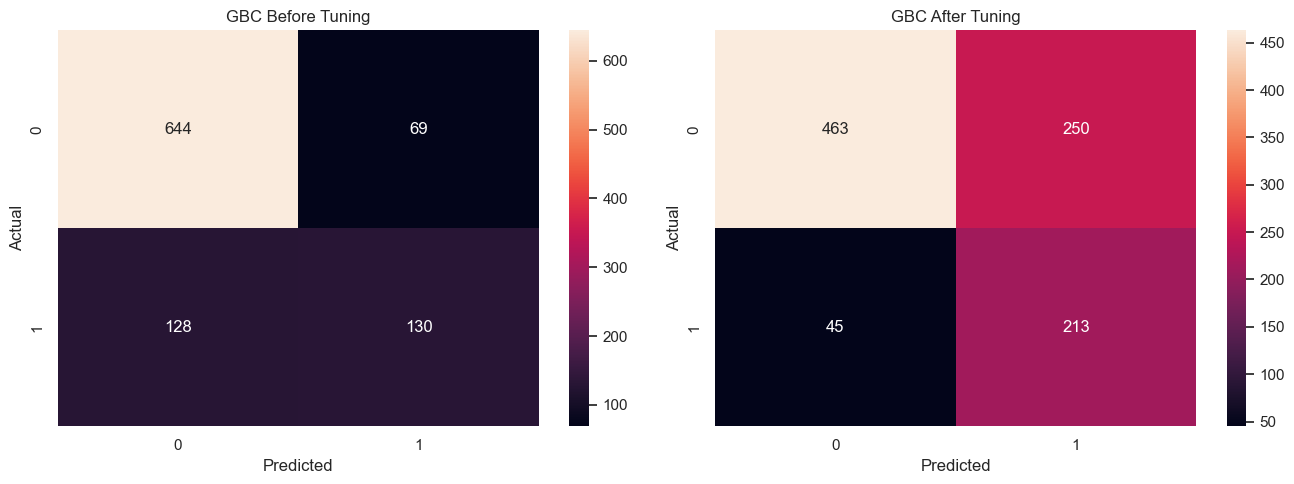

In [42]:
confusion_matrix_before_tuning = confusion_matrix(y_test, y_pred_before_tuning)
confusion_matrix_after_tuning = confusion_matrix(y_test, y_pred_gbc_tuning)
confusion_matrix_after_tuning_and_threshold = confusion_matrix(y_test, y_pred_with_threshold)

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix_before_tuning, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GBC Before Tuning')

plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix_after_tuning, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GBC After Tuning')

plt.tight_layout()
plt.show()


Before Tuning:
- The model has a relatively high number of true negatives (644) and a lower number of true positives (130).
- The false negatives (128) are considerably high, indicating many actual churners were missed.
- The false positives (69) are relatively low, meaning fewer non-churners were incorrectly identified as churners.

After Tuning:
- True positives significantly increased to 213, indicating the model's ability to correctly identify churners improved.
- However, the number of true negatives dropped to 463, and false positives increased to 250, meaning more non-churners were incorrectly predicted as churners.
- False negatives reduced dramatically to 45, suggesting fewer actual churners were missed.

After Tuning with Threshold Adjustment:
- True negatives increased to 460, indicating a better balance compared to post-tuning without threshold adjustment.
- False positives increased to 253, which is an improvement from the previous tuning.
- False negatives decreased slightly to 36, but still lower than before tuning.
- True positives are slightly higher at 222 compared to post-tuning without threshold adjustment but still significantly higher than before tuning.

### Final Model

In [43]:
# Best Model
model_final = gbc_tuning

# Predict
y_prob = model_final.predict_proba(X_test)
y_prob

array([[0.50725232, 0.49274768],
       [0.49699687, 0.50300313],
       [0.5134471 , 0.4865529 ],
       ...,
       [0.50525938, 0.49474062],
       [0.4946927 , 0.5053073 ],
       [0.50830034, 0.49169966]])

### Feature Importance

In [44]:
features = list(transformer_treebased.get_feature_names_out())
# features

list_features = []
for feature in features:
    list_features.append(feature.split('__')[-1])

list_features

['contract_Month-to-month',
 'contract_One year',
 'contract_Two year',
 'dependents_No',
 'dependents_Yes',
 'onlinesecurity_No',
 'onlinesecurity_No internet service',
 'onlinesecurity_Yes',
 'onlinebackup_No',
 'onlinebackup_No internet service',
 'onlinebackup_Yes',
 'internetservice_DSL',
 'internetservice_Fiber optic',
 'internetservice_No',
 'deviceprotection_No',
 'deviceprotection_No internet service',
 'deviceprotection_Yes',
 'techsupport_No',
 'techsupport_No internet service',
 'techsupport_Yes',
 'paperlessbilling_No',
 'paperlessbilling_Yes',
 'tenure',
 'monthlycharges']

In [65]:
# feature importance

imp = model_gbc[-1].feature_importances_
imp

array([4.63870073e-01, 3.35186020e-03, 4.41246504e-03, 5.68623816e-03,
       1.32611940e-03, 5.44779985e-02, 9.68537615e-05, 6.14789297e-04,
       1.17012605e-02, 0.00000000e+00, 8.51795596e-04, 2.30892043e-03,
       8.24716970e-02, 0.00000000e+00, 8.76160386e-04, 0.00000000e+00,
       1.92388100e-03, 2.86047805e-02, 0.00000000e+00, 2.30107583e-03,
       1.02494108e-02, 9.33627494e-03, 1.89738021e-01, 1.25800325e-01])

In [66]:
# feature importance dataframe
feature_imp_tuned = pd.DataFrame({
    'importance':imp,
    'feature' : list_features
}).sort_values(by='importance',ascending=False)

display(feature_imp_tuned)

,importance,feature
0,0.463870,contract_Month-to-month
22,0.189738,tenure
23,0.125800,monthlycharges
12,0.082472,internetservice_Fiber optic
5,0.054478,onlinesecurity_No
17,0.028605,techsupport_No
8,0.011701,onlinebackup_No
20,0.010249,paperlessbilling_No
21,0.009336,paperlessbilling_Yes
3,0.005686,dependents_No


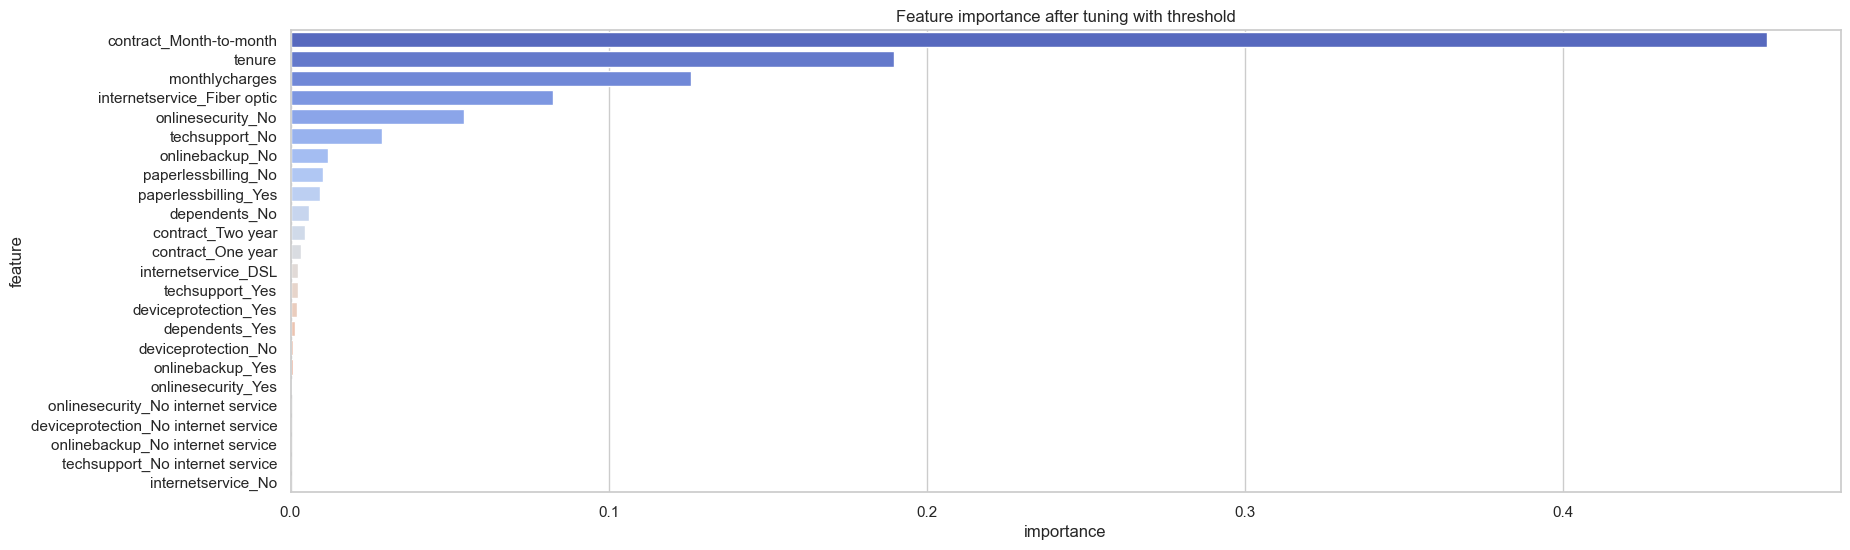

In [67]:
plt.figure(figsize=(20, 6))

sns.barplot(data=feature_imp_tuned, x='importance', y='feature', orient='h', palette='coolwarm')
plt.title('Feature importance after tuning with threshold')

plt.show()

Before Tuning:

In the graph before tuning, the feature 'tenure' is the most important, with a significant margin over other features. This suggests that how long a customer has been with the company is a strong indicator of whether they will churn. The next most important feature is 'internetservice_Fiber optic,' indicating that customers with fiber optic internet might have different churn patterns compared to those with other types of internet service. 'Monthlycharges' is also a significant factor, reflecting the impact of monthly costs on customer retention. Other important features include contract types (one year and two years), and services like online security and paperless billing. These factors collectively help in predicting customer churn, but their individual contributions are less than tenure.

After Tuning:

After tuning the model, the feature importance ranking shifts significantly. 'Contract_Month-to-month' emerges as the most influential feature, underscoring that customers with this type of contract are more likely to churn compared to those with longer-term contracts. 'Tenure' maintains its significance but is now secondary in importance, suggesting that while the duration of customer relationships still matters, contract type has a stronger impact post-tuning. 'Monthlycharges' remains a crucial predictor, indicating that the cost of services continues to influence churn rates. Features related to service provision such as 'internetservice_Fiber optic' and 'onlinesecurity_No' also retain their importance, emphasizing the role of service quality and security in customer retention. Interestingly, features like 'dependents_No' and 'techsupport_No' show increased importance after tuning, indicating nuanced insights into customer behavior that were refined through model optimization.

---

# **Model Saving**

In [48]:
model_final = gbc_tuning
model_final.fit(X_train, y_train)

with open('model_gbc.sav', 'wb') as wdm:
    pickle.dump(model_final, wdm)

___

# **Explanaible AI**

### SHAP Explanation on testing data

In [49]:
test_transformed = pd.DataFrame(
    model_final[0].transform(X_test)
    , columns = list_features)
test_transformed

,contract_Month-to-month,contract_One year,contract_Two year,dependents_No,dependents_Yes,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,...,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,paperlessbilling_No,paperlessbilling_Yes,tenure,monthlycharges
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,60.0,99.65
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,74.25
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,68.0,90.80
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,19.0,100.95
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,20.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,24.0,70.00
967,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,44.0,77.55
968,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,32.0,74.75
969,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,24.0,104.15


PermutationExplainer explainer: 972it [00:20, 23.31it/s]                         


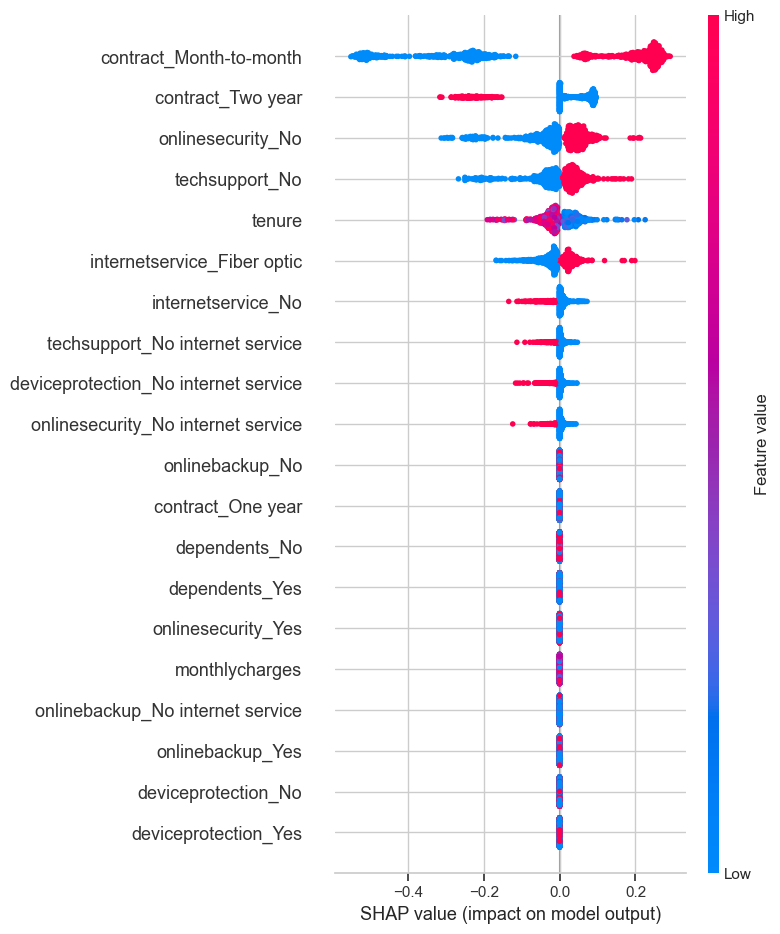

In [64]:
# explainer

explainer = shap.Explainer(
    model_final[-1].predict,
    model_final[0].transform(X_test)
)

shap_values = explainer(test_transformed)
shap.summary_plot(shap_values, test_transformed)

`contract_Month-to-month:` Customers with a month-to-month contract (represented by red points on the right) are more likely to churn, as indicated by the positive SHAP values.
Customers with non-month-to-month contracts (represented by blue points on the left) are less likely to churn.

`contract_Two year:` Having a two-year contract reduces the likelihood of churn, as indicated by the negative SHAP values.

`onlinesecurity_No:` Customers who do not have online security are more likely to churn, as indicated by the positive SHAP values.

`techsupport_No:` Similar to online security, the lack of tech support increases the likelihood of churn.

`tenure:` Longer tenure (red points) decreases the likelihood of churn, as indicated by the negative SHAP values on the left. Shorter tenure (blue points) increases the likelihood of churn.

`internetservice_Fiber optic:` Customers using fiber optic internet service are more likely to churn, indicated by positive SHAP values.

`internetservice_No:` Not having internet service is associated with a lower likelihood of churn.

`deviceprotection_No internet service, techsupport_No internet service, onlinesecurity_No internet service:` These features have minimal impact on the model's prediction as their SHAP values are close to zero.

`onlinebackup_No, contract_One year, dependents_No/Yes:` These features also show varying degrees of impact but are less significant compared to the top features.


### SHAP explanation on training data

In [51]:
# shap_values for explain all features in train
X_train_trans = model_final[0].transform(X_train)

# explainer
explainer = shap.TreeExplainer(
    model_final.named_steps['model'],
    data = X_train_trans,
    feature_perturbation = 'interventional',
    model_output = 'probability'
    
)

# shap values
shap_values = explainer(X_train_trans)

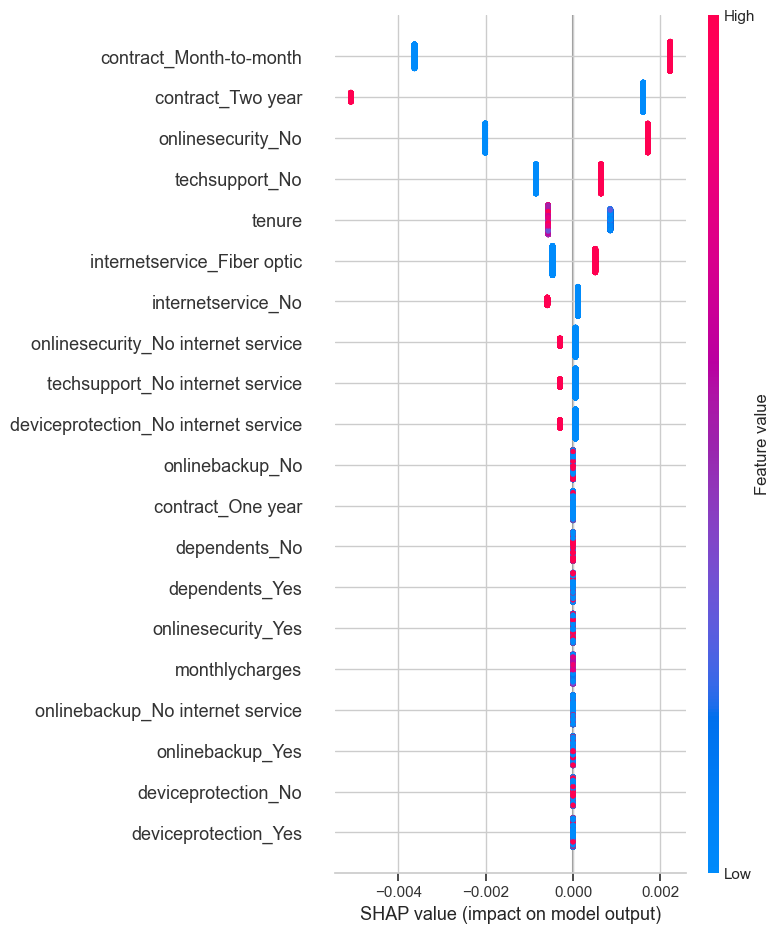

In [52]:
# summary plot for model in train
shap.summary_plot(
    shap_values,
    X_train_trans,
    feature_names = list_features
)

Contract type and tenure are strong predictors of churn, with month-to-month contracts and shorter tenure being associated with higher churn. Lack of additional services such as online security and tech support also increases churn risk. Fiber optic internet users tend to have a higher churn rate compared to other types of internet services.

### SHAP explanation for each customer

In [53]:
X_test_preprocessed = pd.DataFrame(
    model_final[0].transform(X_test),
    columns=list_features
)

X_test_preprocessed

,contract_Month-to-month,contract_One year,contract_Two year,dependents_No,dependents_Yes,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,...,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,paperlessbilling_No,paperlessbilling_Yes,tenure,monthlycharges
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,60.0,99.65
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,74.25
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,68.0,90.80
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,19.0,100.95
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,20.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,24.0,70.00
967,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,44.0,77.55
968,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,32.0,74.75
969,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,24.0,104.15


Testing on the second customer in test dataset

In [54]:
X_test.iloc[1], y_test.iloc[1]

(dependents                      No
 tenure                           9
 onlinesecurity                 Yes
 onlinebackup                    No
 internetservice        Fiber optic
 deviceprotection                No
 techsupport                     No
 contract            Month-to-month
 paperlessbilling               Yes
 monthlycharges               74.25
 Name: 580, dtype: object,
 1)

In [55]:
# function to visualize shap values in a plot
def shap_plot(idx, model, dataset):
    shap.initjs()
    explainerModel = shap.TreeExplainer(model)
    shap_values_model = explainerModel.shap_values(dataset)
    p = shap.force_plot(explainerModel.expected_value, shap_values_model[idx], dataset.iloc[[idx]])
    return (p)

In [56]:
# let's compare the real result
i = 1

y_pred_gbc_tuning = y_pred_gbc_tuning.reshape(-1, 1)
print(f'The prediction of this customer is: {('Churn' if y_pred_gbc_tuning[i] == 1 else 'Not Churn')} --> from Final Model')
print(f'The prediction of this customer is: {('Churn' if y_test.iloc[i] == 1 else 'Not Churn')} --> from Actual Data')

shap_plot(
    i,
    model_final['model'],
    X_test_preprocessed
)

The prediction of this customer is: Churn --> from Final Model
The prediction of this customer is: Churn --> from Actual Data


For the (index) 1 customer we can conclude that:

**Base Value:**
The base value represents the average model output over the entire training dataset. In this case, it is around -0.000001579, which is very close to zero. This value is the reference point for understanding how the features impact the prediction for this specific customer.

**Feature Contributions:**

Negative Contributions (Left Side):
Features that decrease the prediction value are shown on the left side. These features have negative SHAP values, indicating they contribute to reducing the prediction probability.

- onlinesecurity_No = 0: The presence of online security slightly reduces the prediction value, decreasing the likelihood of the predicted outcome.

Positive Contributions (Right Side):
Features that increase the prediction value are shown on the right side. These features have positive SHAP values, indicating they contribute to increasing the prediction probability.

- internetservice_Fiber optic = 1: Having a fiber optic internet service increases the prediction value, indicating a higher likelihood of the predicted outcome.
- techsupport_No = 1: The absence of technical support increases the prediction value, contributing positively to the predicted outcome.
- tenure = 9: A tenure of 9 months increases the prediction value, though the impact is relatively smaller compared to other features.
- contract_Two year = 0: Not having a two-year contract increases the prediction value, suggesting a higher likelihood of the predicted outcome.
- contract_Month-to-month = 1: Having a month-to-month contract significantly increases the prediction value, strongly contributing to the predicted outcome.

**Model Output (f(x)):**
The sum of the base value and the feature contributions gives the final model output for this specific instance, which is around 0.01. This value represents the predicted probability of the outcome for this customer.

In [57]:
# explainer

explainer = lime_tabular.LimeTabularExplainer(
    training_data = model_final[0].transform(X_train),
    feature_names = list_features,
    class_names = ['Not Churn', 'Churn'],
    mode = 'classification'
)

explainer

The prediction of this customer is: Churn --> from Final Model
The prediction of this customer is: Churn --> from y_test


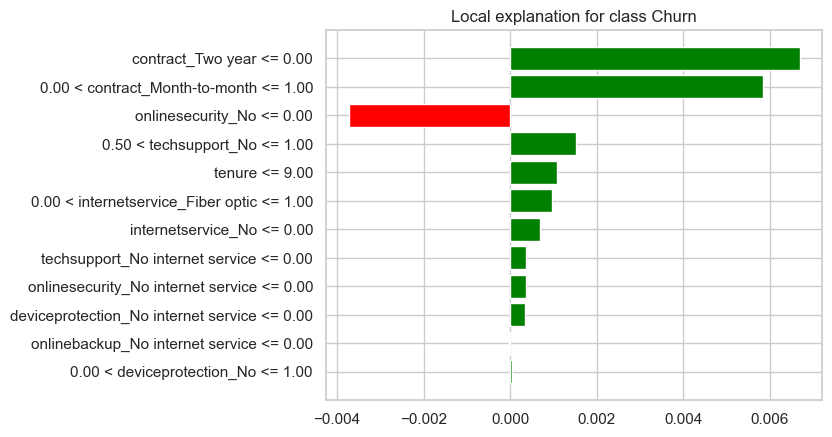

In [58]:
# lime observation using pyplot
i = 1

y_pred_gbc_tuning = y_pred_gbc_tuning.reshape(-1, 1)
print(f'The prediction of this customer is: {('Churn' if y_pred_gbc_tuning[i] == 1 else 'Not Churn')} --> from Final Model')
print(f'The prediction of this customer is: {('Churn' if y_test.iloc[i] == 1 else 'Not Churn')} --> from y_test')

exp = explainer.explain_instance(
    X_test_preprocessed.iloc[i],
    model_final['model'].predict_proba,
    num_features = 12
)

exp.as_pyplot_figure()
plt.show()

The likelihood of churn for this customer is notably reduced by having a two-year contract and a tenure exceeding nine months. The absence of internet service, along with associated features like device protection, tech support, online backup, and online security, further contributes to lowering the churn probability. Factors such as having fiber optic internet service and monthly charges falling between $70.50 and $89.99 slightly elevate churn risk, while variables such as having dependents and tech support have minimal impact. In summary, the customer's extended contract commitment and reduced reliance on additional internet-related services are pivotal reasons for their decreased likelihood of churn.

In [59]:
# lime observation using pyplot
i = 1

print(f'The prediction of this customer is: {('Churn' if y_pred_gbc_tuning[i] == 1 else 'Not Churn')} --> from Final Model')
print(f'The prediction of this customer is: {('Churn' if y_test.iloc[i] == 1 else 'Not Churn')} --> from Actual Data')

exp = explainer.explain_instance(
    X_test_preprocessed.iloc[i],
    model_gbc['model'].predict_proba
)

exp.show_in_notebook(show_table = True)
plt.show()

The prediction of this customer is: Churn --> from Final Model
The prediction of this customer is: Churn --> from Actual Data


Based on the prediction probability of 0.52 towards "Not Churn," which aligns with our default threshold of > 0.50, this customer is categorized as not likely to churn. The factors contributing to the churn prediction, represented by orange bars, highlight several significant features. These include not having a two-year contract, having a month-to-month contract, lacking tech support, having a tenure of 9 months or less, and using fiber optic internet service. These aspects collectively increase the churn likelihood. Conversely, factors with minimal impact on the churn decision, indicated by green bars, include having online security and monthly charges falling within the range of $70.50 to $89.99. These features play a lesser role in influencing the churn prediction for this customer.

----

<div style="text-align: center;">
    <h1><strong>Conclusion</strong></h1>
</div>



**Implementation of business ML**: By integrating machine learning into our business operations, we can optimize revenue lost from customers who actually stop using our services (churn) but are not accurately identified.

**Evaluation metric (Recall)**: Recall is an evaluation metric that helps us identify which customer segments are likely to stop using our services (churn) and how many of the actual churned customers we successfully predicted.

**Objectives reached**: Achieving a **84% recall** allows us to reduce missed opportunities to retain revenue from customers who genuinely churn but are not recognized as such. Maximizing lost opportunities in this context refers to efforts to identify customers who stop using services (churn) but are not accurately detected by the machine learning model used.

**The positive impacts of maximizing lost opportunities (minimizing lost opportunities)** can be felt by the business in several ways:
1.	Revenue Retention: By identifying more customers who actually churn, businesses can take appropriate steps to retain them.
2.	Optimization of Resource Utilization: By minimizing undetected customer churn, businesses can allocate resources more efficiently, including reducing costs associated with acquiring new customers by retaining existing ones.
3.	Improved Customer Satisfaction: With more accurate predictions of customer behavior, businesses can provide more timely and relevant services. This can enhance long-term customer satisfaction and retention.
4.	Increased Profitability: Overall, by reducing undetected churn, businesses can maintain more stable revenue over time. This can positively impact profitability by minimizing revenue losses from customers who actually churn.

From the dataset, we can conclude the following features correlate with churn:
- `Use of Fiber Optic and Churn Likelihood:` This insight suggests that customers using Fiber Optic services tend to have higher churn rates compared to those using other types of services like DSL or no internet at all. Possible reasons include service quality issues such as frequent disconnections or slow speeds, leading customers to seek better alternatives.
- `Month-to-Month Contract and Churn Likelihood:` Customers with month-to-month contracts tend to have higher churn rates compared to those with longer-term contracts (e.g., one or two years). The flexibility of monthly contracts allows customers to switch providers without facing high contract termination fees, which may be a primary reason for higher churn.
- `Short Tenure and Churn Likelihood`: Customers with shorter tenure periods typically experience higher churn rates. Initial dissatisfaction, such as technical issues or poor customer service during the early stages of their subscription, may prompt them to switch to another provider quickly.
- `Lack of Additional Services (Online Security, Tech Support, and Online Backup) and Churn Likelihood:` Customers who do not use additional services like online security, tech support, or online backup tend to have higher churn rates. These additional services can enhance perceived value for customers. Without access to or usage of these services, customers may feel less connected to or served by their service provider, influencing their decision to switch.



<div style="text-align: center;">
    <h1><strong>Recommendations and Limitations</strong></h1>
</div>


**Recommendations:**
1.	Enhance service quality for fiber optic users: address service quality issues like frequent disconnections or slow speeds experienced by fiber optic users to reduce churn rates.
2.	Offer incentives for long-term contracts: encourage customers to opt for longer contract durations by offering incentives or discounts, thus potentially reducing churn rates associated with month-to-month contracts.
3.	Improve the initial customer experience: focus on enhancing the initial customer experience to mitigate early dissatisfaction and reduce churn among customers with short tenure periods.
4.	Promote additional services: increase awareness and utilization of additional services such as online security, tech support, and online backup to enhance perceived value and reduce churn rates among customers who do not currently use these services.

**Limitations of the Model:**
- **False positives (FPs)**: The model incorrectly predicts 282 cases as churn (FPs). This can lead to unnecessary retention efforts for customers who are not actually at risk of churning, potentially increasing operational costs (example: marketing and advertising).
- **True negatives (TNs)**: There are 431 TNs where the model correctly identifies non-churn cases. This can help the company save on costs typically spent on retention efforts (efforts to retain customers). However, it's important to note that too many TNs can also indicate that the model may be too conservative in its predictions, which could cause the company to miss opportunities to take preventive action against customers who actually have the potential to churn.
- **Impact of cost**:

    - Cost Impact on Budget for False Positives (FPs): If each retention effort costs $10 per customer, the budget impact for FP cases would be: 
        - **Budget Impact** = 
                            282 × $10 = $2820

    - Impact on True Negatives (TNs) and True Positives (TPs): TNs (431 cases) represent correctly identified non-churn cases, saving retention costs and maintaining stable revenue. TPs (232 cases) indicate correctly identified churn cases, enabling targeted retention efforts and potentially saving revenue.
    
    - Lost Revenue due to False Negatives: Each false negative represents a customer who actually churned but was not predicted as such. If the average monthly charge is $70:     
        - **Lost Revenue** =26 × $70 = $1,820

**Business Impact Considerations:**
- Impact on Customer Retention Strategies: False negatives can hinder the effectiveness of customer retention efforts, as these customers may leave before any intervention can be made.
- Long-Term Revenue Loss: Beyond immediate lost revenue, false negatives can lead to a cumulative loss over time if churned customers are not retained.
- This model could be apply for limited of time, with consideration with False Positives and business objectives.


---

<div style="text-align: center;">
    <h3>Thank You</h3>
</div>

----